In [ ]:
'''
  author : @hunarbatra
'''

import numpy as np                            
import pandas as pd                              
import matplotlib.pyplot as plt                  
import seaborn as sns                          
import datetime
import warnings
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Global Mobility Data
# This is the Google Global Mobility Data
# Link for this dataset = https://drive.google.com/file/d/1cJJ0KIOhAnZxORVmVYZM2evOLgQMnHaH/view?usp=sharing
link = '/content/drive/My Drive/Global_Mobility_Report (6).csv'
mobility = pd.read_csv(link, header=0, usecols = lambda column : column not in ["country_region_code", "sub_region_1" , "sub_region_2"], engine = 'python', parse_dates = True)
mobility.tail()

,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
350986,Zimbabwe,2020-05-09,-38.0,-22.0,-30.0,-57.0,-24.0,24.0
350987,Zimbabwe,2020-05-10,-41.0,-27.0,-29.0,-64.0,-12.0,23.0
350988,Zimbabwe,2020-05-11,-37.0,-31.0,-27.0,-54.0,-31.0,30.0
350989,Zimbabwe,2020-05-12,-35.0,-26.0,-30.0,-53.0,-31.0,29.0
350990,Zimbabwe,2020-05-13,-36.0,-25.0,-27.0,-54.0,-30.0,28.0


In [ ]:
# Dataset : Task 9 Oxford 33 Countries Dataset --- upto 16/04/2020
# link : https://drive.google.com/open?id=1zlxHQ_SWBXUr-ZYiKBrf-p5bHqxQ5S2y
link = '/content/drive/My Drive/oxford33.csv'
policy_data = pd.read_csv(link, header=0, index_col=['Date'], engine = 'python', parse_dates = True)
policy_data.fillna(0)

,CountryName,S1_School_closing,S1_scope,S2_Workplace_closing,S2_scope,S3_Cancel_public_events,S3_scope,S4_Close_public_transport,S4_scope,S5_Public_info_campaigns,S5_scope,S6_Restrictions on internal movement,S6_scope,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing policy,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Health_infrastructure,Health_equipment,Health_workforce,Managing_other_health_services,Domestic_violence,Managing_essential_services_for_households,Exemptions_for_affected_households,Low_interest_lending_to_businesses,Tax_relief_businesses,Income_support_households,Postponed_loans_businesses,Access_employment_insurance,Migrant_workers_policies
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-02,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-03,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-04,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-05,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-12,Zimbabwe,2.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,1.0,14.0,3.0,88.1,88.1,1,0,1,0,0,1,1,0,1,1,0,0,0.0
2020-04-13,Zimbabwe,2.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,1.0,14.0,3.0,88.1,88.1,1,0,1,0,0,1,1,0,1,1,0,0,0.0
2020-04-14,Zimbabwe,2.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,1.0,17.0,3.0,88.1,88.1,1,0,1,0,0,1,1,0,1,1,0,0,0.0


In [ ]:
# Oxford, Mobility & Healthcare Combined Dataset - Latest 
# Data upto 6th May for all variables except for Mobility which is available upto 30th April
# Dataset download link : https://drive.google.com/open?id=1kaEPXAORXkPg-AWWdBPD0nINl5jdukS8
link = '/content/drive/My Drive/Oxford_Mobility_Task6Latest.csv'
df = pd.read_csv(link, header=0, engine = 'python', parse_dates = True)
df.head()
df.tail()

,CountryName,Class,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,ConfirmedCases,Daily_confirmed,Active_ConfirmedCases,Normalized_Active_Confirmed_per_10000pop,ConfirmedDeaths,Daily_deaths,MIR%,C1,C2,C3,C4,C5,C6,C7,H1,C8,StringencyIndex,population,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Daily_RecoveryCases,Stability_Index,Daily_Nurses_per_10000,Nurses_per_10000,Daily_Medical_Doctors_per_10000,Medical_Doctors_per_10000,Daily_Hospital_Beds_per_10000,Hospital_Beds_per_10000_population
12822,Zimbabwe,Low_Income,2020-05-02,3,1,3,1,2,1,3,1,1,1,2,1,2,1,4,1,1,0,0.0,0.0,2,1,0,1,0.0,0.0,34,0,25,0.01731,4,0,11.76,100.0,100.0,100.0,82.14,64.27,76.18,100.0,100.0,100,82.27,14439018,0,0,0,0,0,0,5,0.0294,19.3327,19.35,2.0787,2.096,16.9827,17.0
12823,Zimbabwe,Low_Income,2020-05-03,3,1,3,1,2,1,3,1,1,1,2,1,2,1,4,1,1,0,0.0,0.0,2,1,0,1,0.0,0.0,34,0,25,0.01731,4,0,11.76,100.0,100.0,100.0,82.14,64.27,76.18,100.0,100.0,100,82.27,14439018,0,0,0,0,0,0,5,0.0294,19.3327,19.35,2.0787,2.096,16.9827,17.0
12824,Zimbabwe,Low_Income,2020-05-04,3,1,3,1,2,1,3,1,1,1,2,1,2,1,4,1,1,0,0.0,0.0,2,1,0,1,0.0,0.0,34,0,25,0.01731,4,0,11.76,100.0,100.0,100.0,82.14,64.27,76.18,100.0,100.0,100,82.27,14439018,0,0,0,0,0,0,5,0.0294,19.3327,19.35,2.0787,2.096,16.9827,17.0
12825,Zimbabwe,Low_Income,2020-05-05,3,1,3,1,2,1,3,1,1,1,2,1,2,1,4,1,1,0,0.0,0.0,2,1,0,1,0.0,0.0,34,0,25,0.01731,4,0,11.76,100.0,100.0,100.0,82.14,64.27,76.18,100.0,100.0,100,82.27,14439018,0,0,0,0,0,0,5,0.0294,19.3327,19.35,2.0787,2.096,16.9827,17.0
12826,Zimbabwe,Low_Income,2020-05-06,3,1,3,1,2,1,3,1,1,1,2,1,2,1,4,1,1,0,0.0,0.0,2,1,0,1,0.0,0.0,34,0,25,0.01731,4,0,11.76,100.0,100.0,100.0,82.14,64.27,76.18,100.0,100.0,100,82.27,14439018,0,0,0,0,0,0,5,0.0294,19.3327,19.35,2.0787,2.096,16.9827,17.0


In [ ]:
countries = ['Argentina','Australia','Bangladesh','Brazil','Canada','Costa Rica','Denmark','Ecuador','Egypt','Germany','Hungary','India','Indonesia',
             'Italy','Japan','Kenya','Malaysia','Pakistan','Philippines','Romania','Serbia','Singapore','South Africa','South Korea','Sweden',
             'Turkey','United States','Vietnam','Zimbabwe']

# countries = ['Australia', 'Brazil', 'Denmark', 'France', 'India', 'Japan', 'South Africa', 'South Korea', 'Sweden', 'United Kingdom', 'United States']

In [ ]:
# List of Dates for Plotting - x-axis
xdates = mobility.date.unique()
xdates = xdates[:len(xdates)-7]
print(len(xdates))

82


In [ ]:
def plot_country(country_name) :
  dates = xdates 
  country_metrics = df.loc[df['CountryName'] == country_name] # task 6 policy dataset
  country_metrics = country_metrics.iloc[45:]
  country_metrics = country_metrics.head(82)
  dates = country_metrics.Date
  mob = mobility.loc[mobility['country_region']==country_name]
  mob = mob.head(82)

  fig, ax = plt.subplots(figsize=(24,12))
  
  country_policies = df.loc[df['CountryName'] == country_name] # task 6 policy dataset
  country_policies = country_policies.iloc[45:]

  new_cases = [None] * 82
  new_cases[0] = 0
  country_policies['ConfirmedCases'] = country_policies['ConfirmedCases'].replace(np.nan, 0)
  policy_new_cases = country_policies['ConfirmedCases'].tolist()
  max_cases = max(policy_new_cases)
  for i in range(1, len(new_cases)) :
    if(policy_new_cases[i] == 0.0) : policy_new_cases[i] = policy_new_cases[i-1]
    new_cases[i] = (policy_new_cases[i] - policy_new_cases[i-1]) #/ max_cases * 1000 
  
  recovered = [None] * 82
  recovered[0] = 0
  policy_rec_cases = country_metrics['Daily_RecoveryCases'].tolist()
  for i in range(1, len(recovered)) :
    if(policy_rec_cases[i] == 0.0) : policy_rec_cases[i] = policy_rec_cases[i-1]
    recovered[i] = (policy_rec_cases[i] - policy_rec_cases[i-1])

  death = [None] * 82
  death[0] = 0
  policy_dead_cases = country_metrics['ConfirmedDeaths'].tolist()
  for i in range(1, len(death)) :
    if(policy_dead_cases[i] == 0.0) : policy_dead_cases[i] = policy_dead_cases[i-1]
    death[i] = (policy_dead_cases[i] - policy_dead_cases[i-1])

  # Oxford Policy Confirmed Cases Data 
  ax.plot_date(dates, new_cases, linestyle='--', label = 'New Cases Daily', color = 'red')
  ax.plot_date(dates, recovered, linestyle='--', label = 'Recovered Cases Daily', color = 'green')
  ax.plot_date(dates, death, linestyle='--', label = 'Deaths', color = 'coral')

  ax2=ax.twinx()
  '''
  ax2.plot_date(dates, 
               ((mob.retail_and_recreation_percent_change_from_baseline + 
                mob.grocery_and_pharmacy_percent_change_from_baseline +
                mob.parks_percent_change_from_baseline +
                mob.transit_stations_percent_change_from_baseline + 
                mob.workplaces_percent_change_from_baseline + 
                mob.residential_percent_change_from_baseline) / 6)
                , linestyle='--', label='Mobility Index')
  '''
  ax2.plot_date(dates, country_metrics['StringencyIndex'], linestyle='-', label='Stringency Index', color='b')
  #ax.xaxis.set_ticks(np.arange(start, end, stepsize))
  #ax2.yaxis.set_ticks(np.arange(0, 105, 10))
  ax2.set_ylim([0, 100])
  ax2.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
  ax.fmt_xdata = mdates.DateFormatter('%d-%m')
  ax2.fmt_xdata = mdates.DateFormatter('%d-%m')
  fig.autofmt_xdate()

  for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)

  for label in ax2.get_xticklabels()[::2]:
    label.set_visible(False)
  
  plt.title(country_name, fontsize=20)
  plt.grid(True)
  plt.xlabel("Dates")
  plt.ylabel("% Change")
  ax.legend(loc="upper left", fontsize=14)
  ax2.legend(loc="upper right", fontsize=14)
  plt.axis('tight')
  plt.style.context('seaborn-white')
  plt.xticks(rotation=90)
  plt.show()

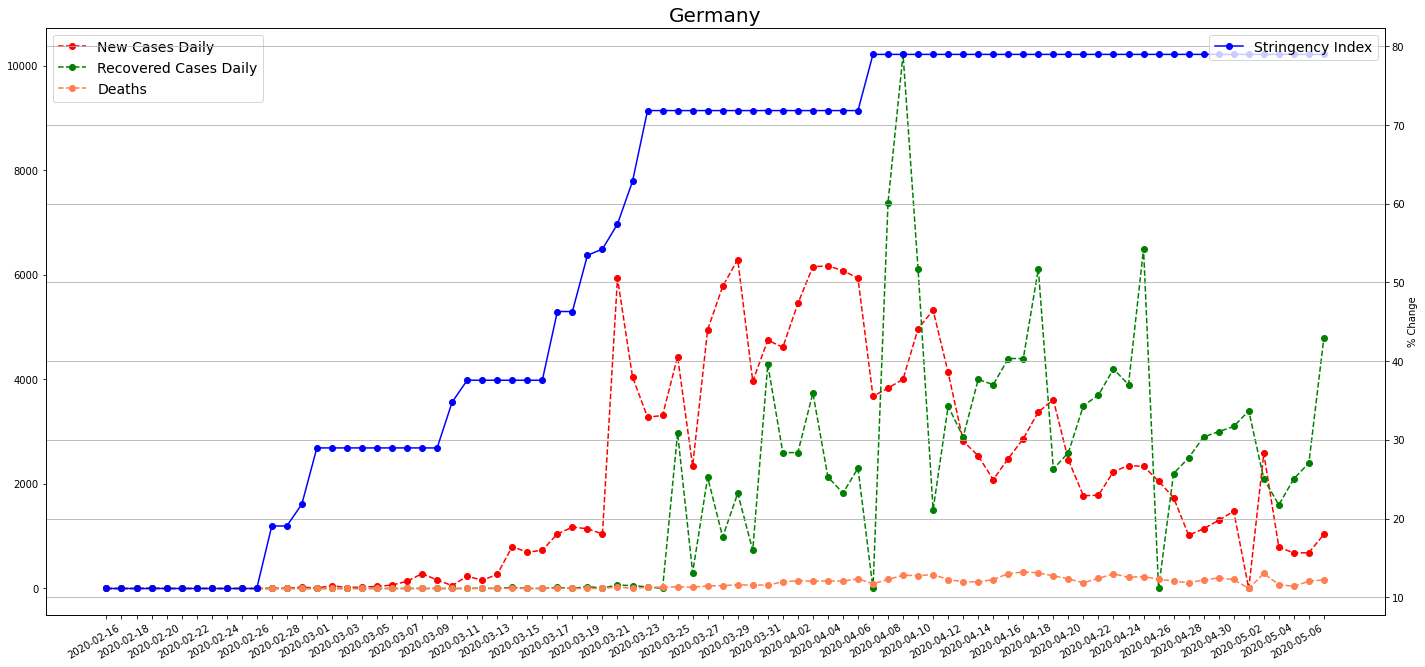

In [ ]:
plot_country('Germany')

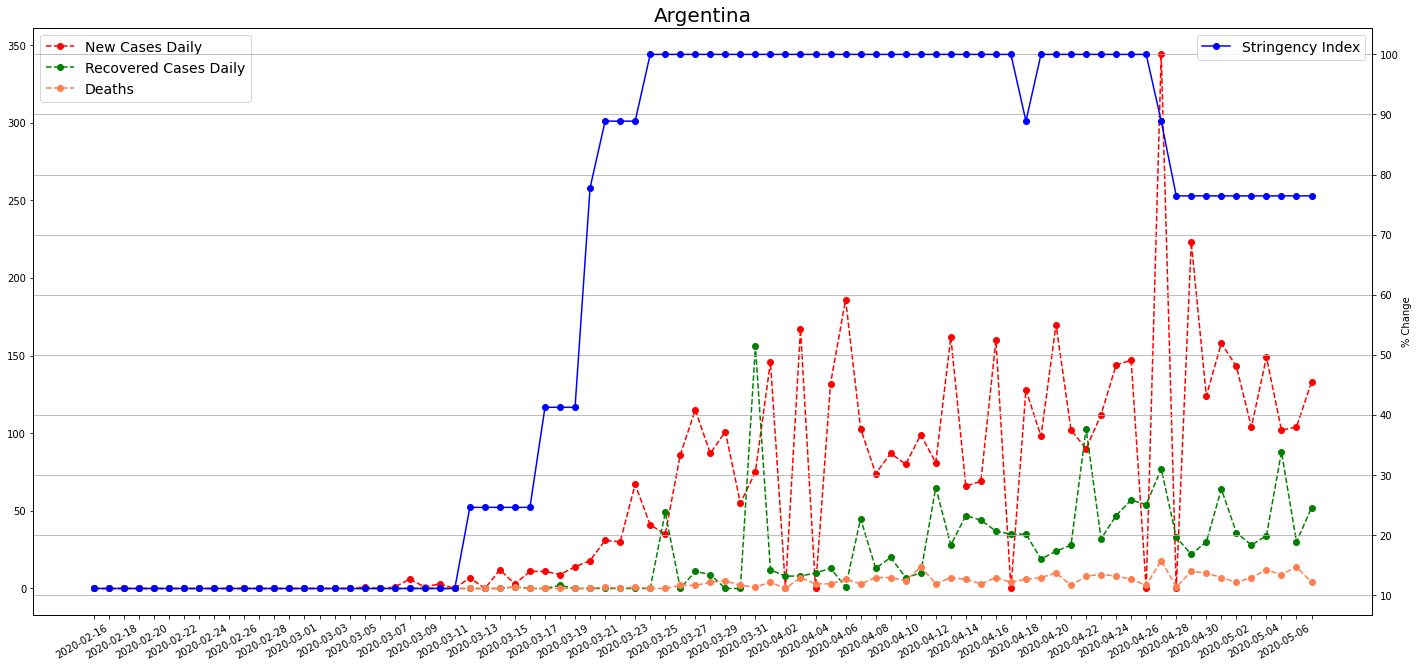

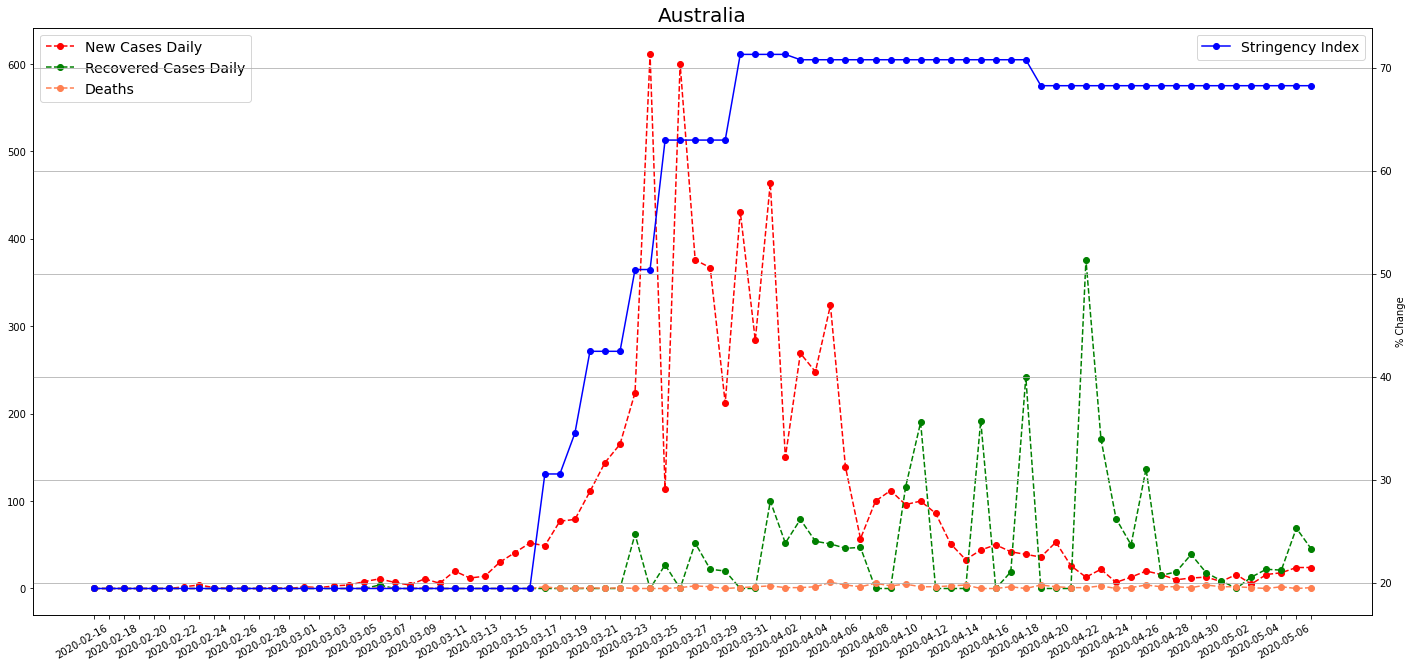

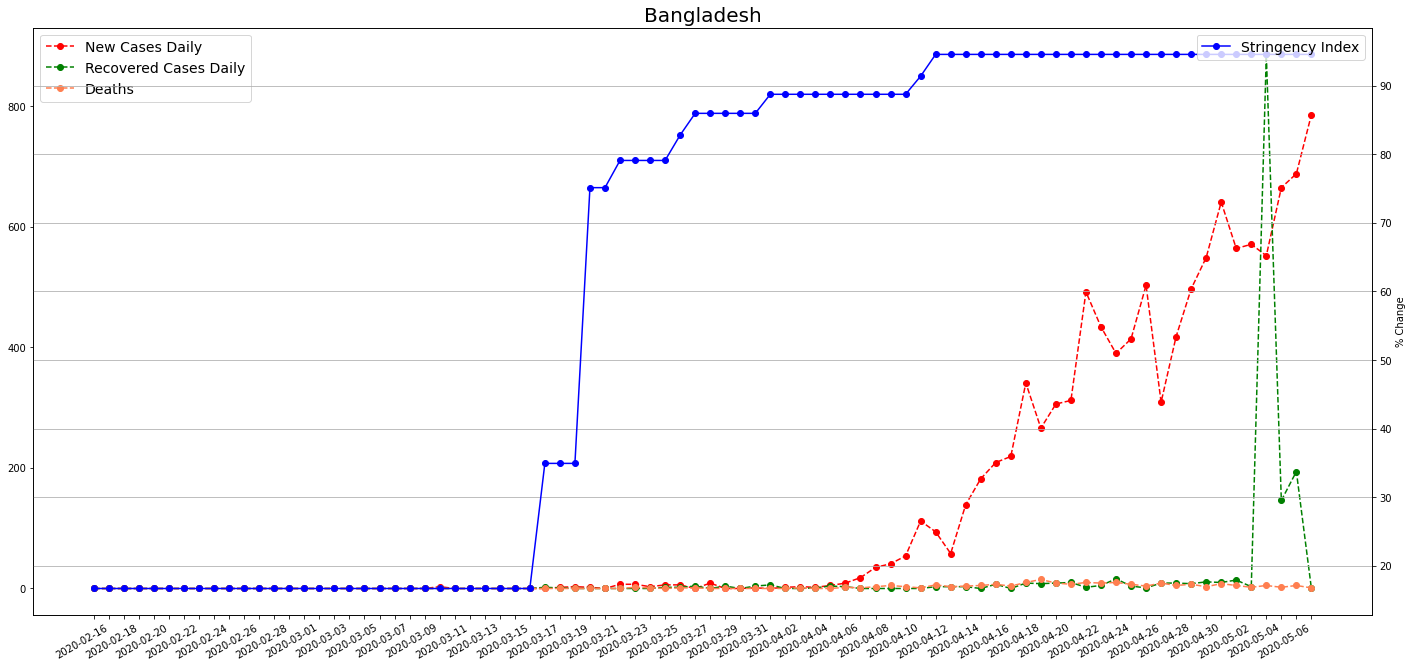

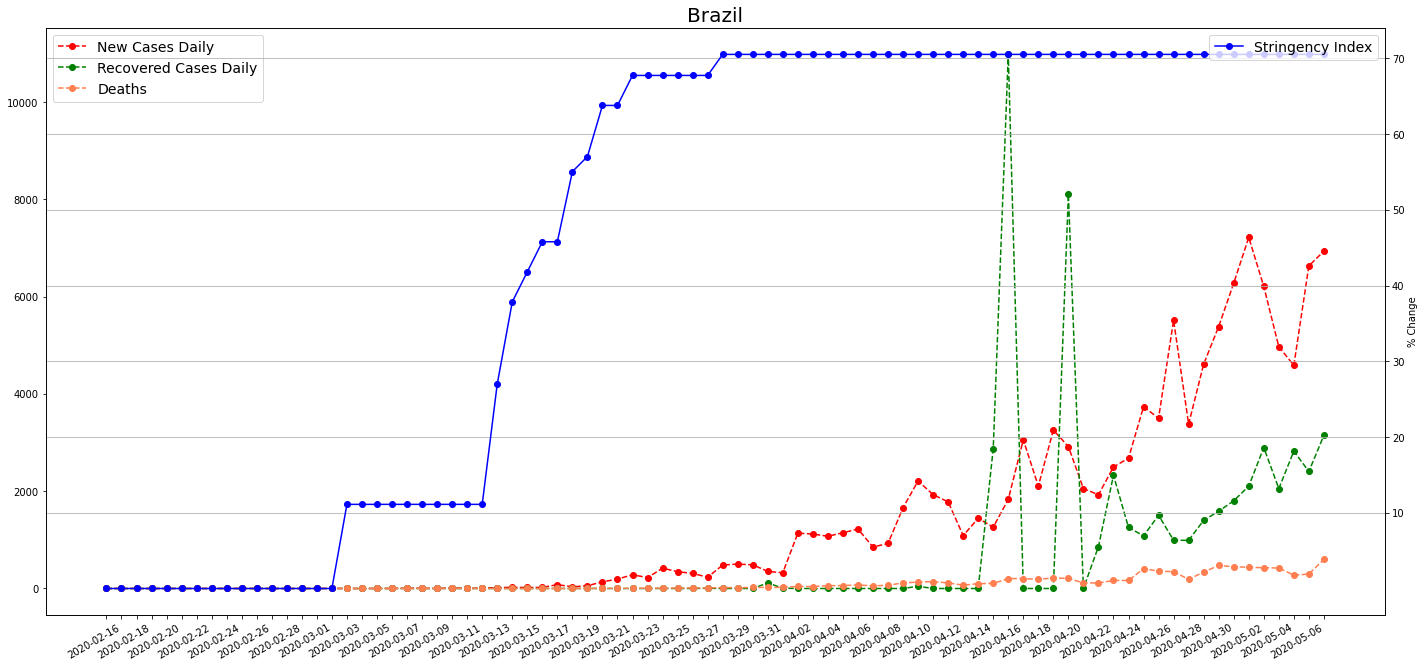

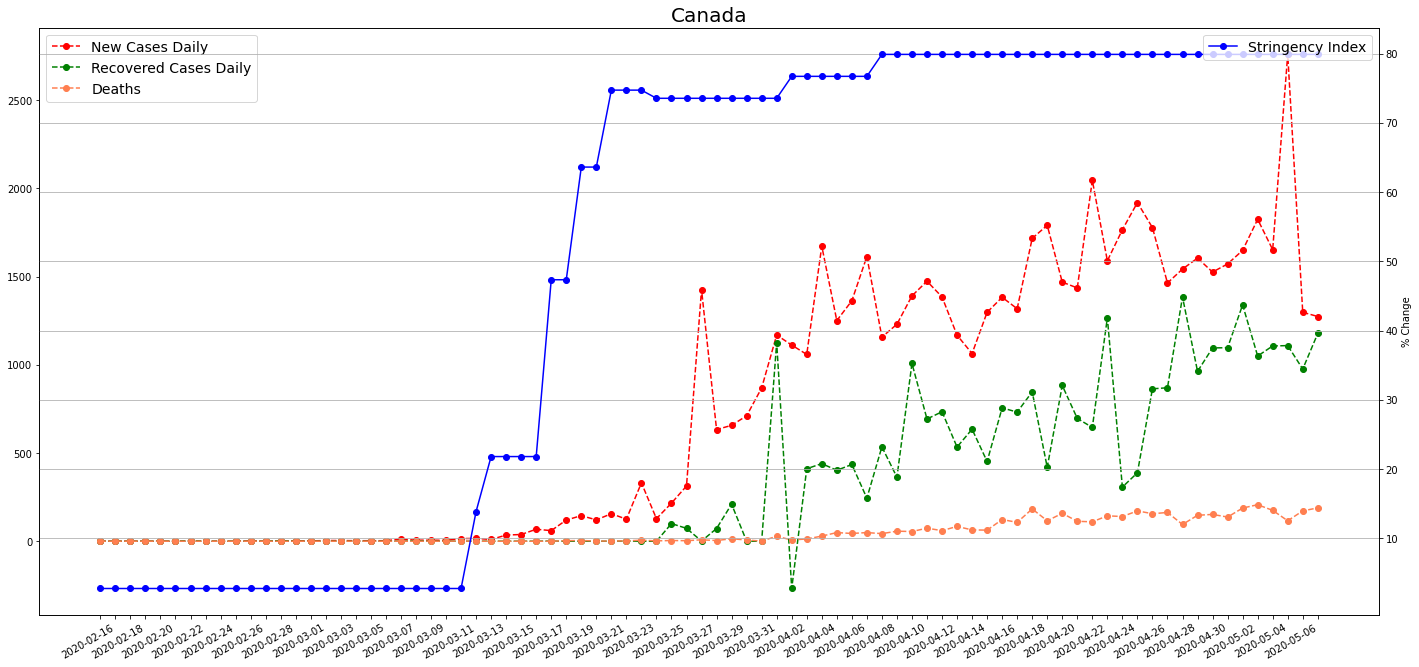

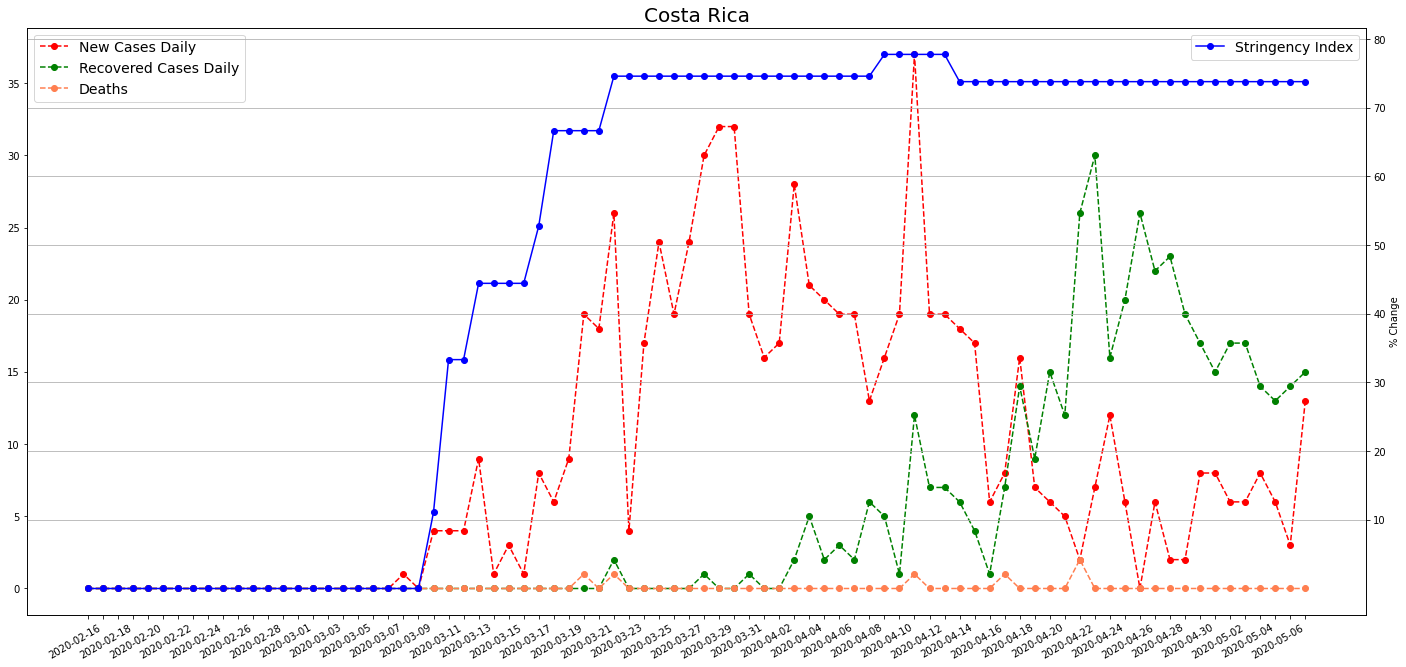

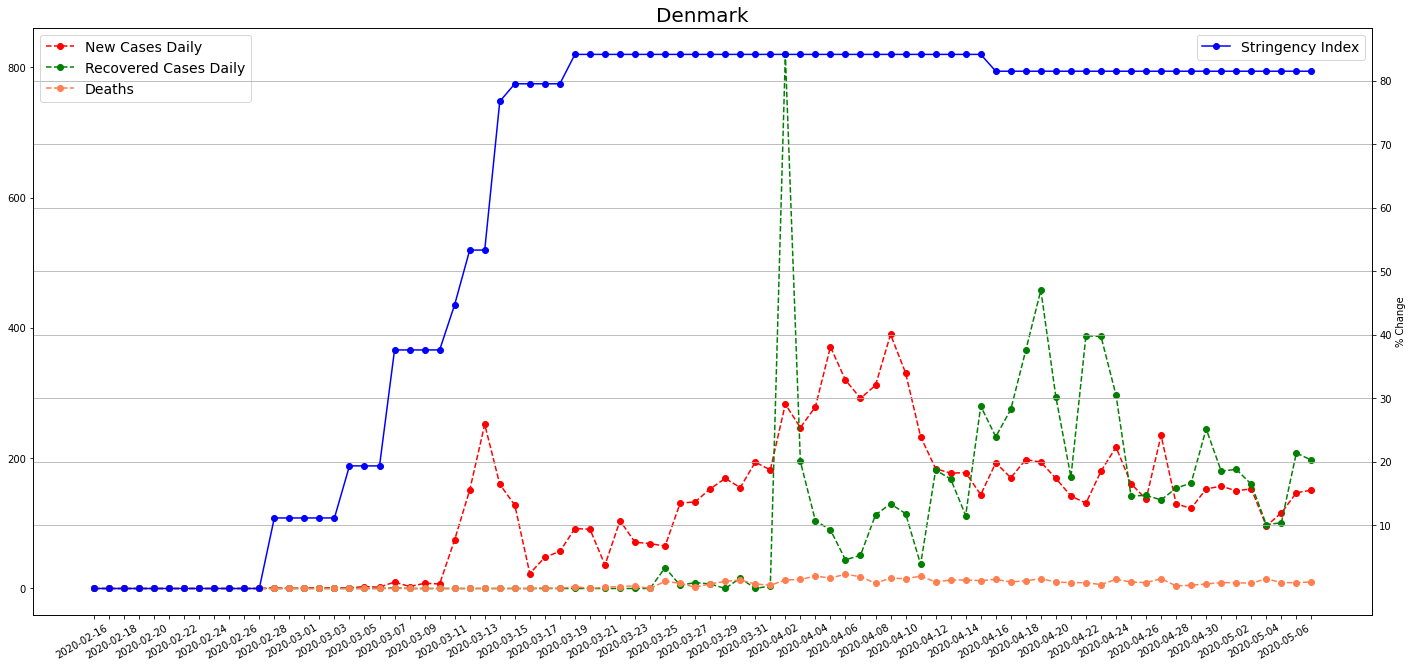

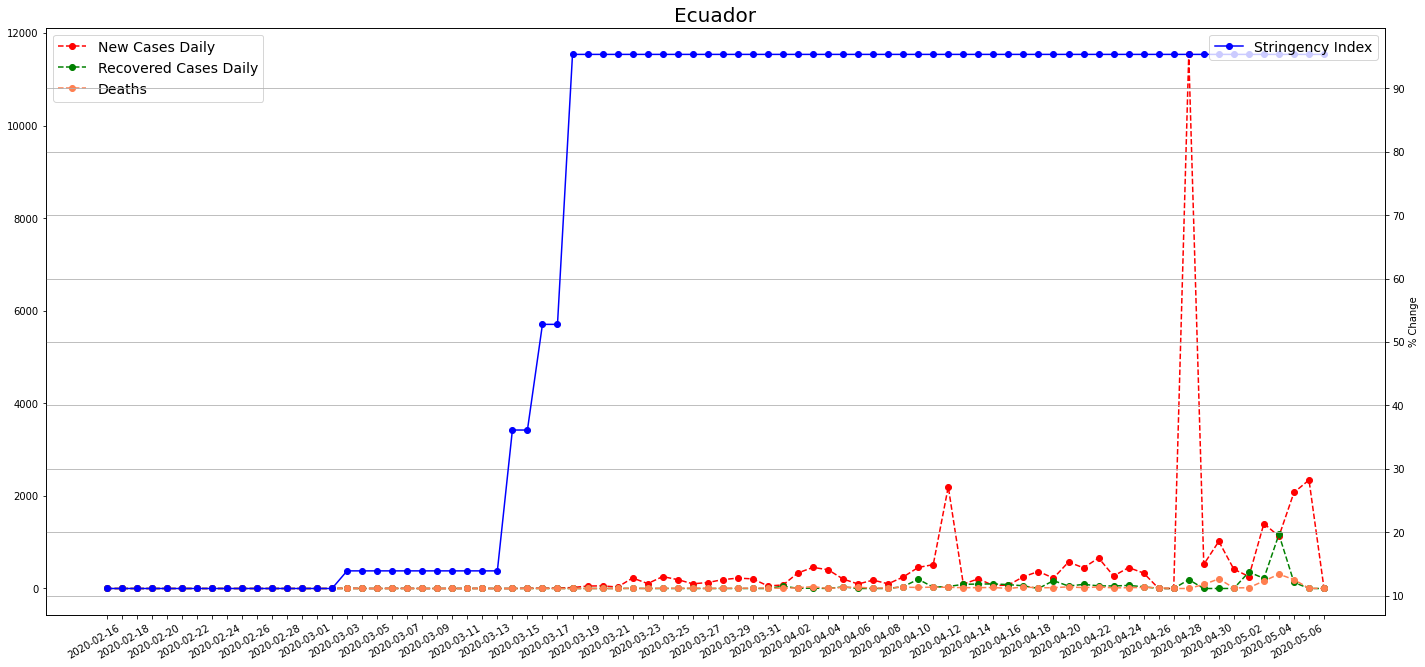

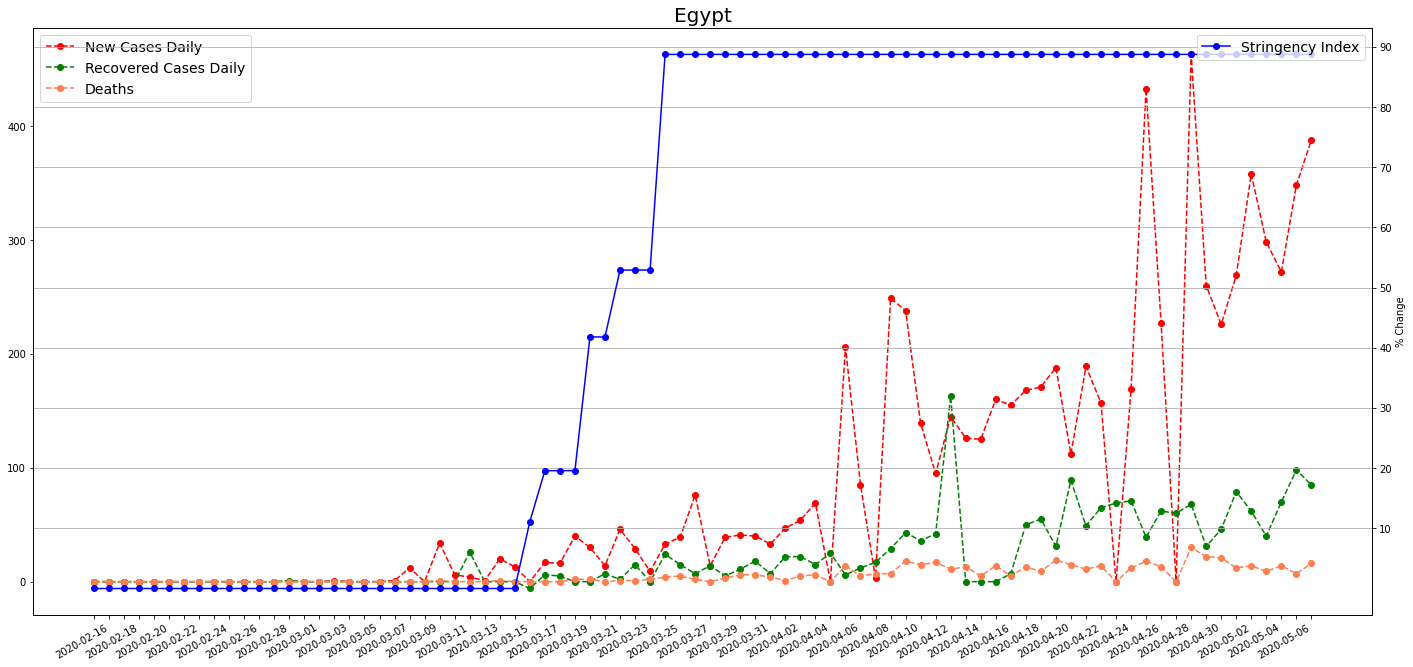

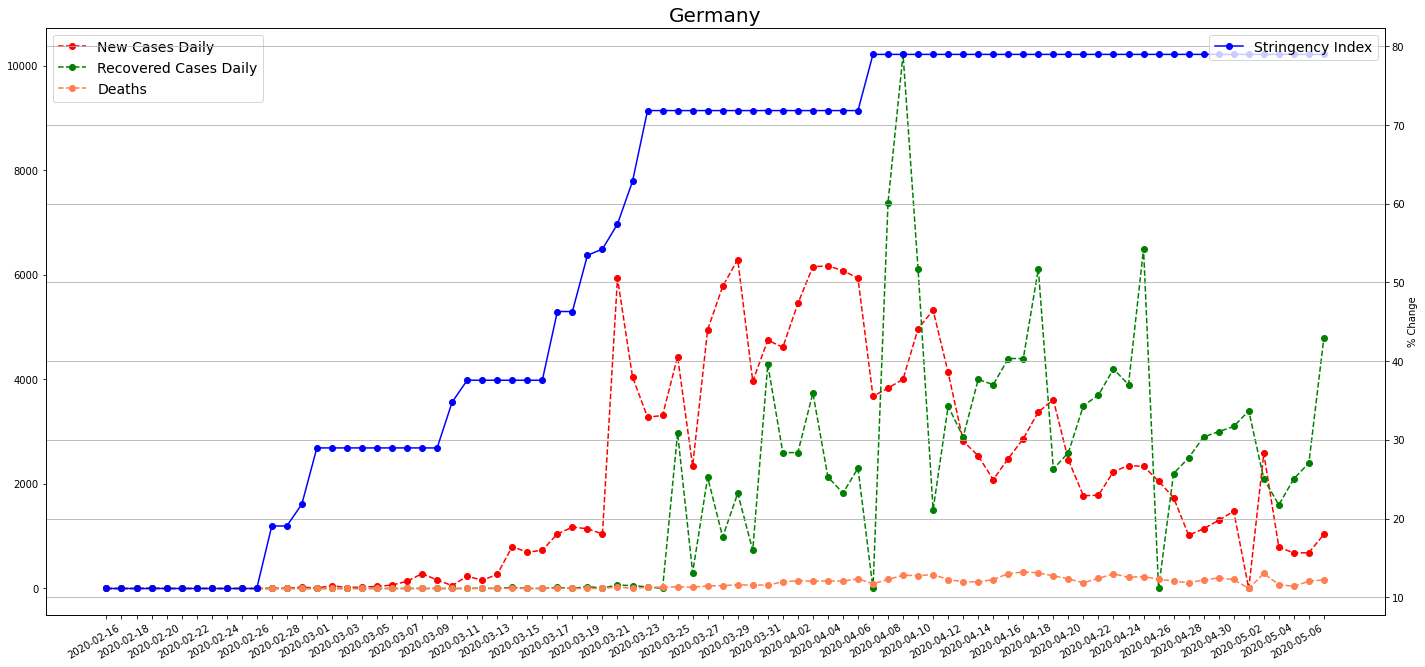

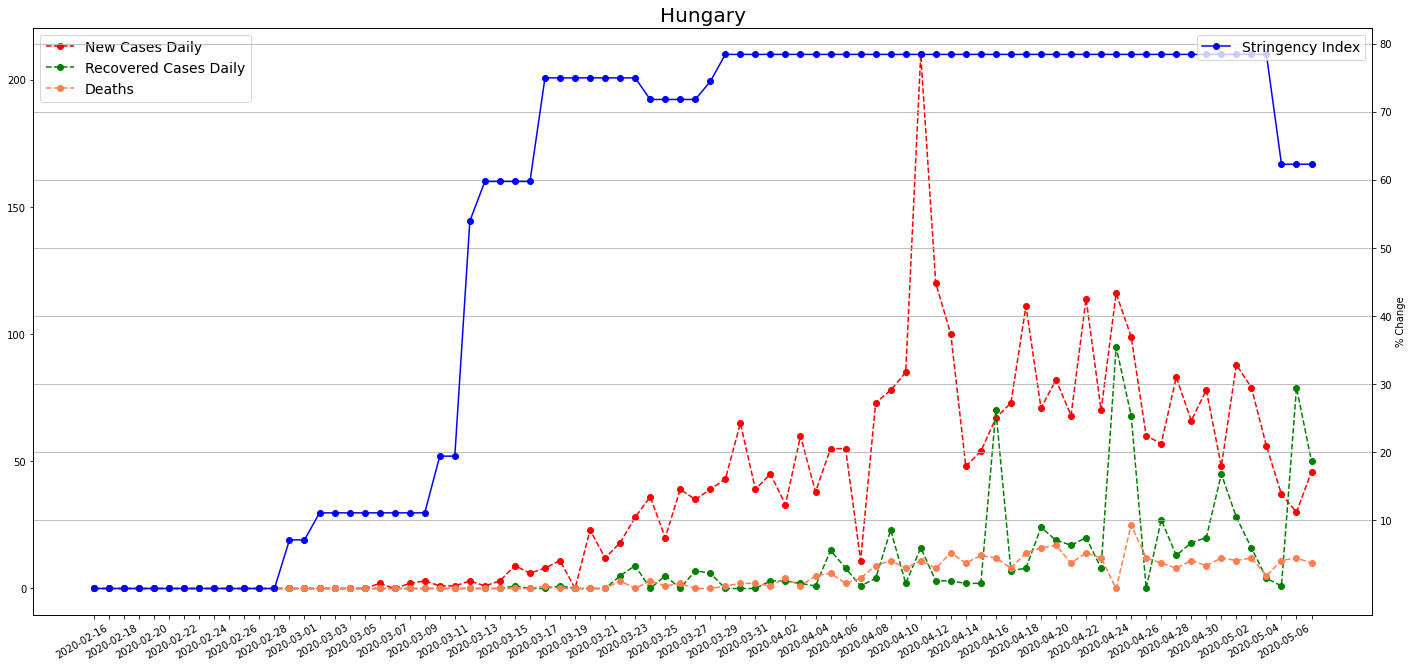

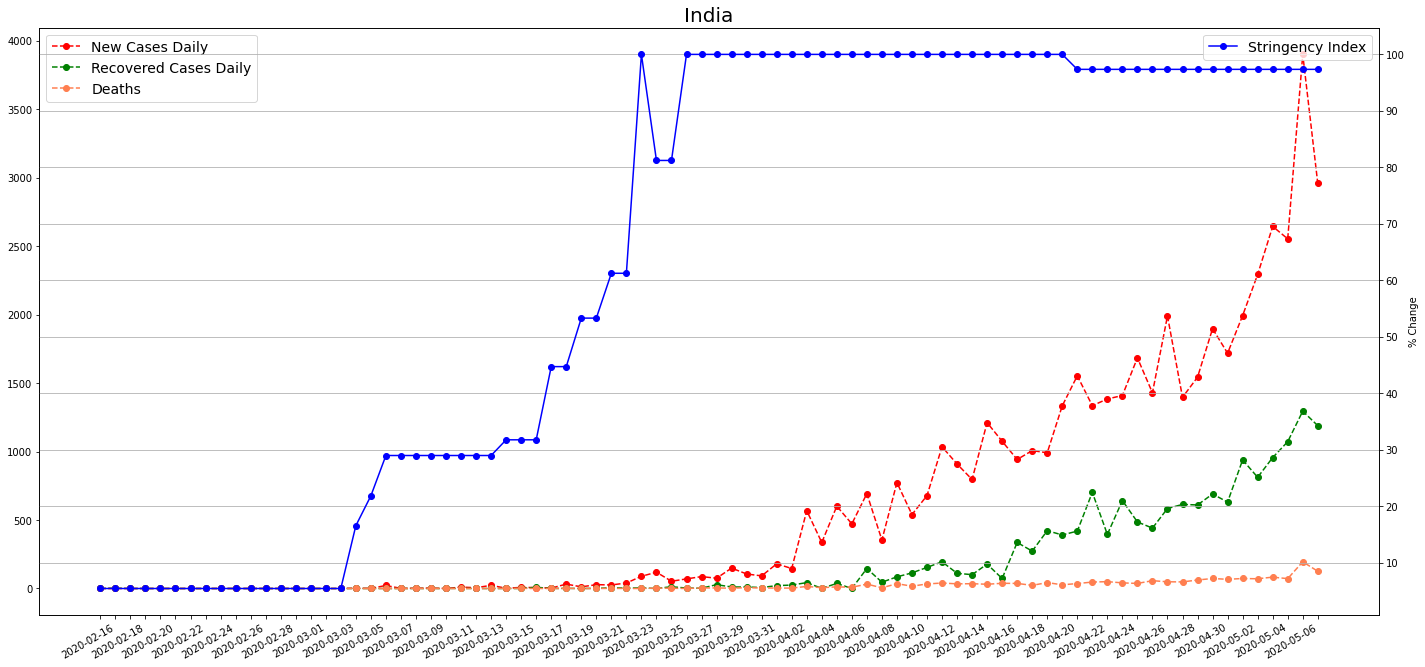

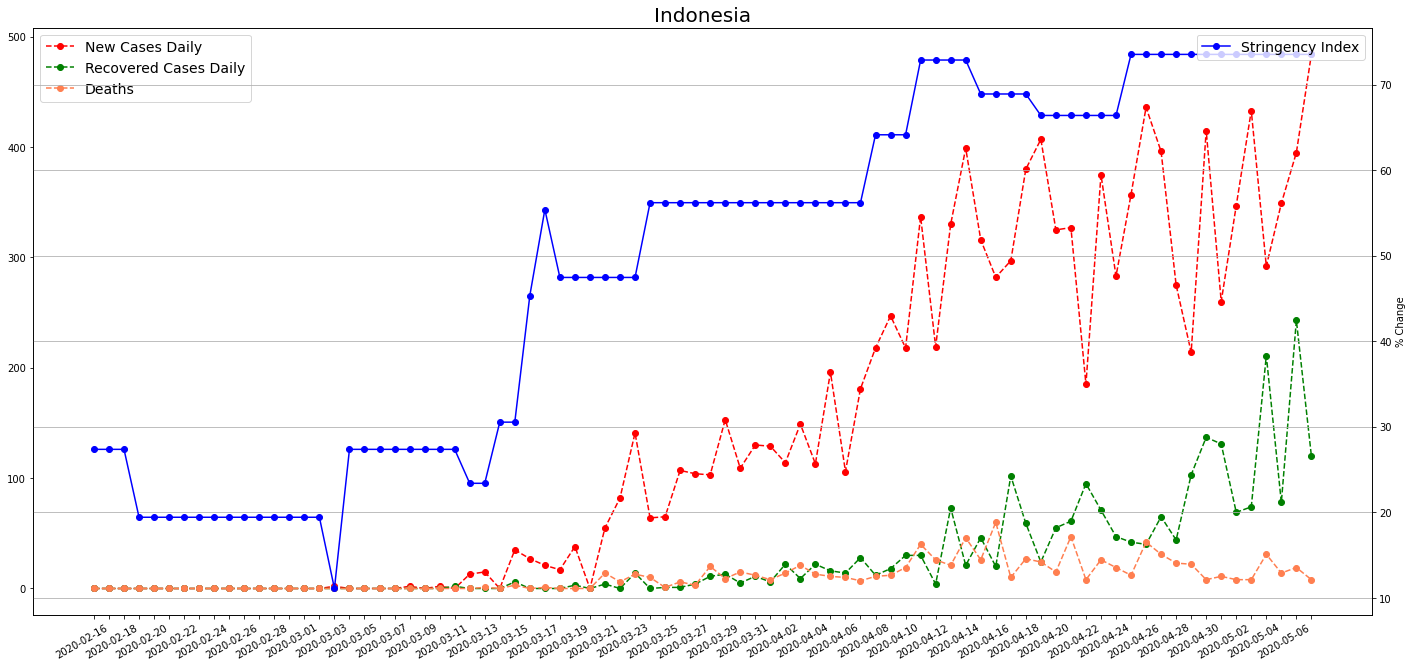

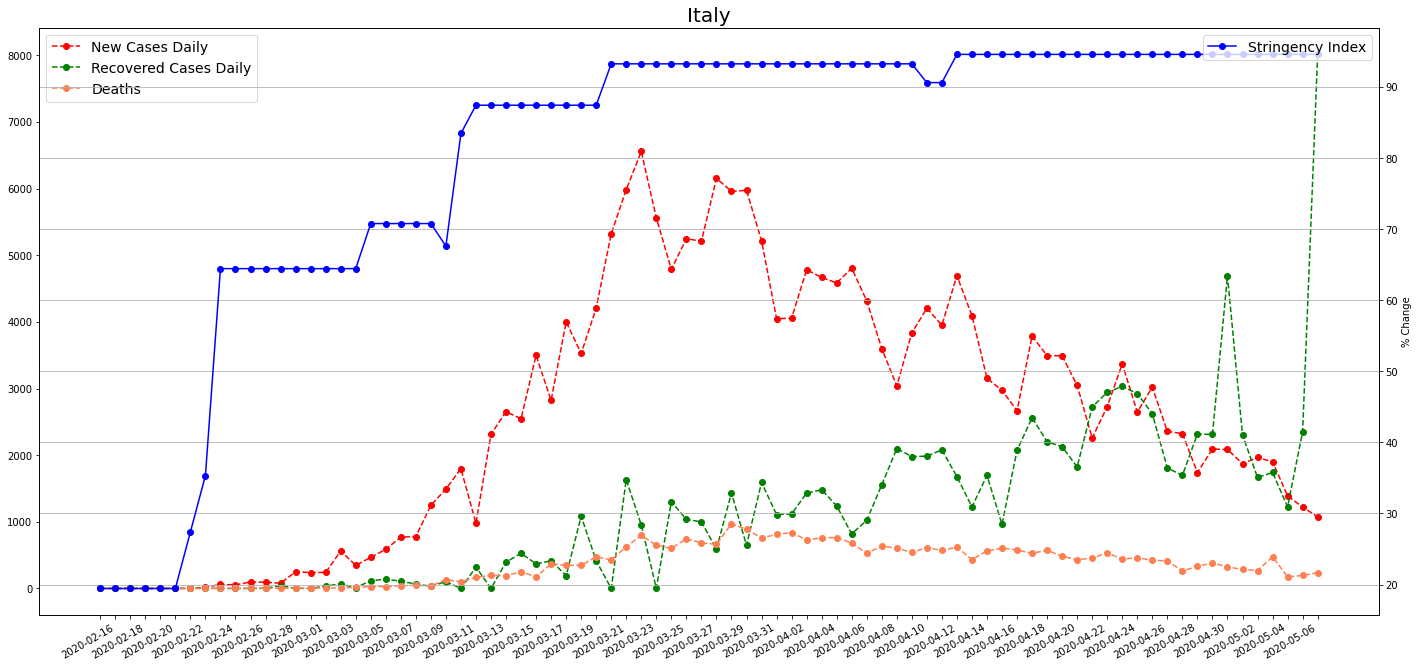

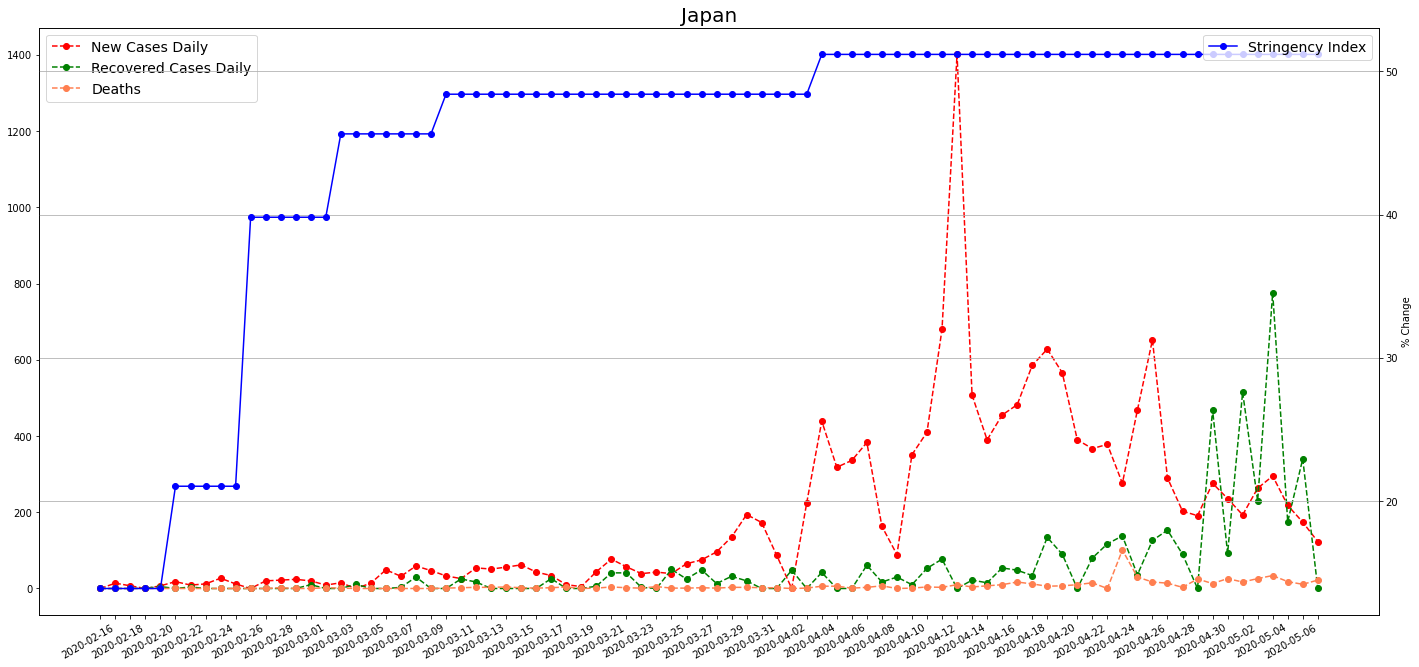

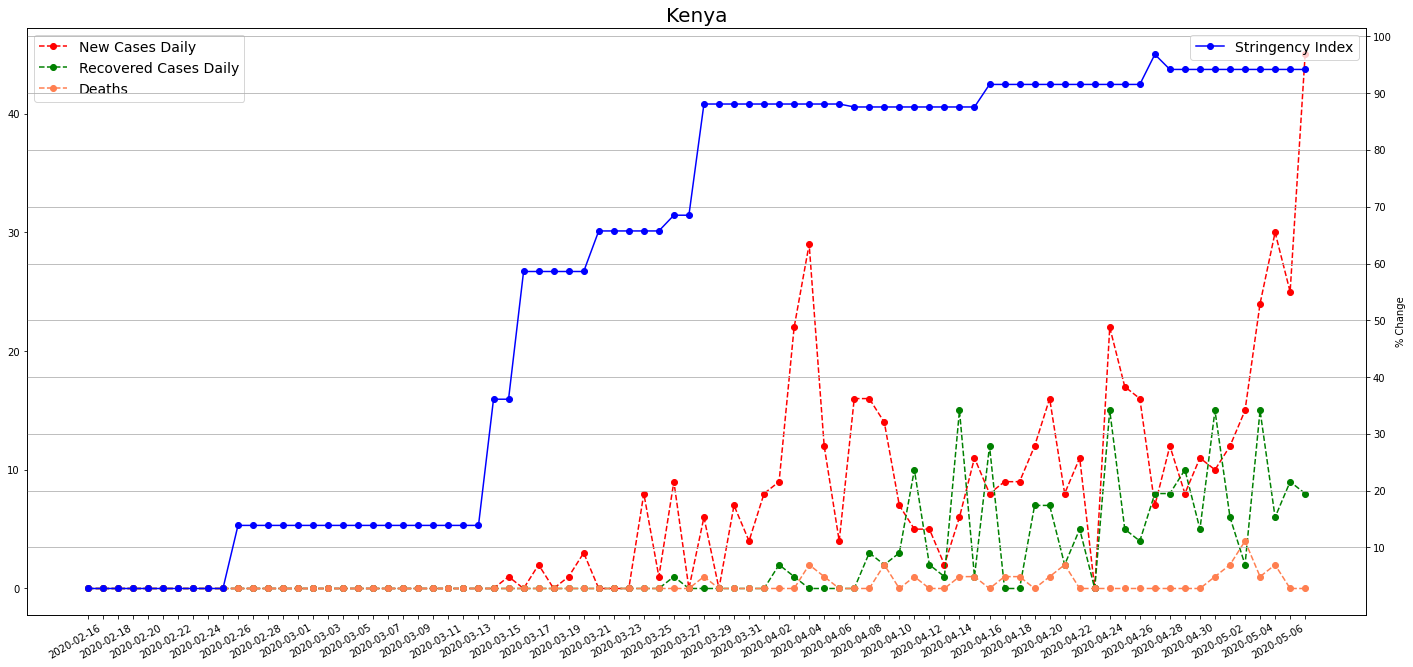

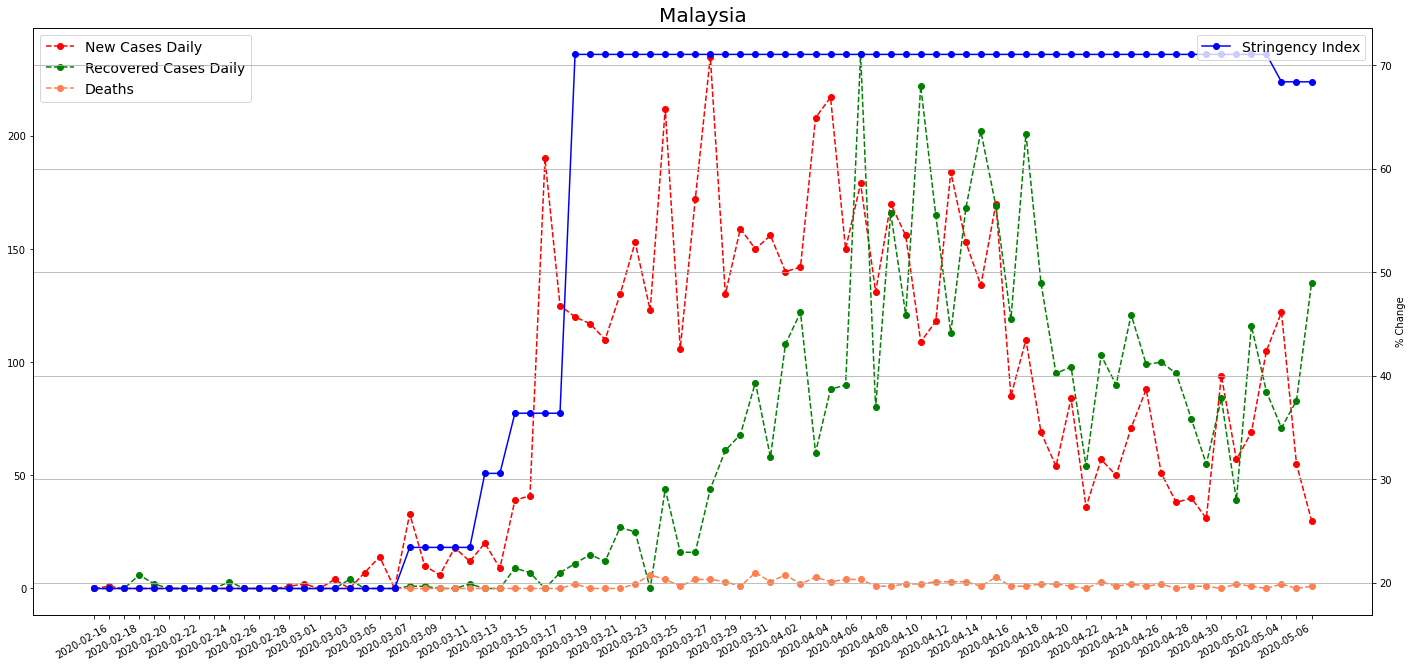

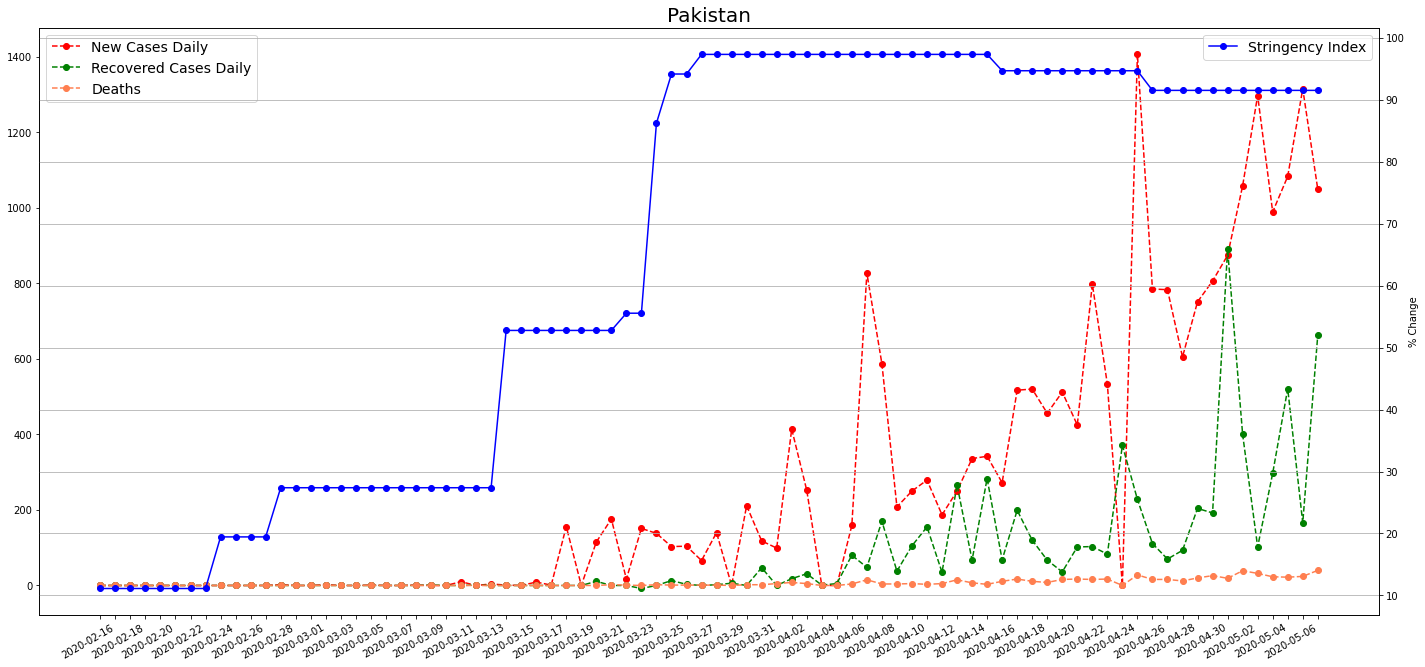

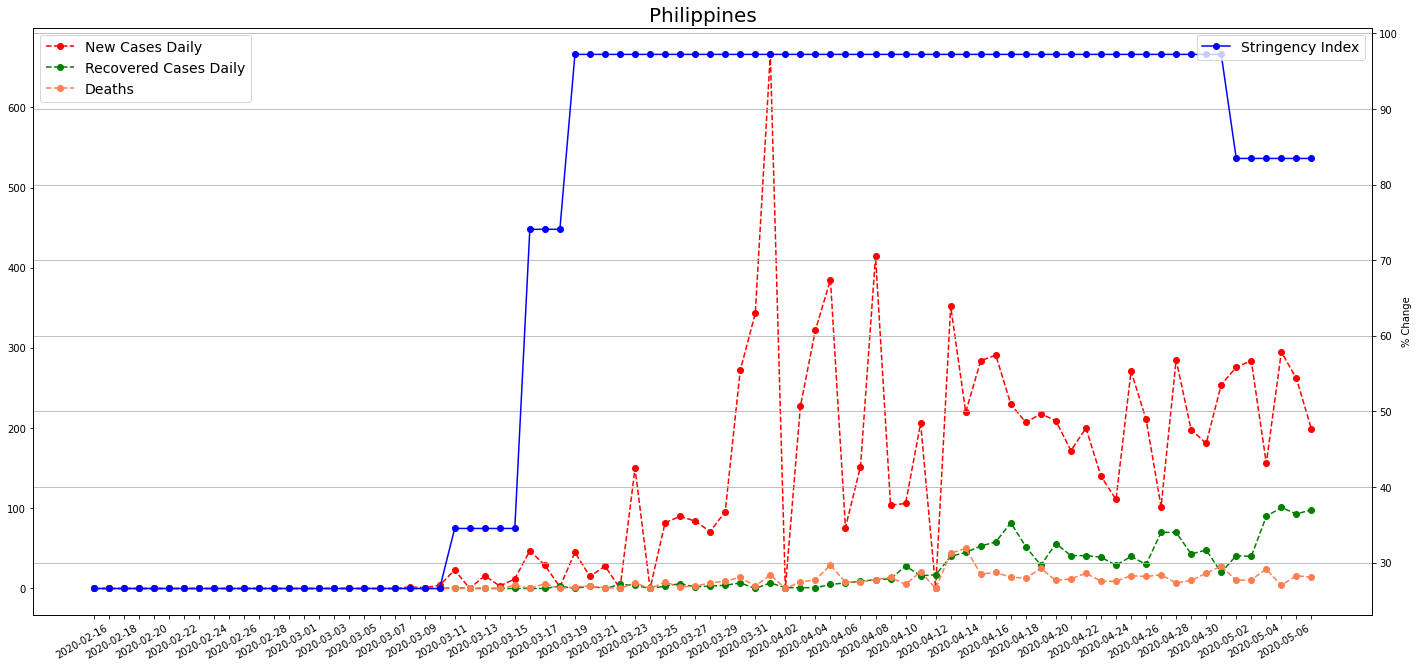

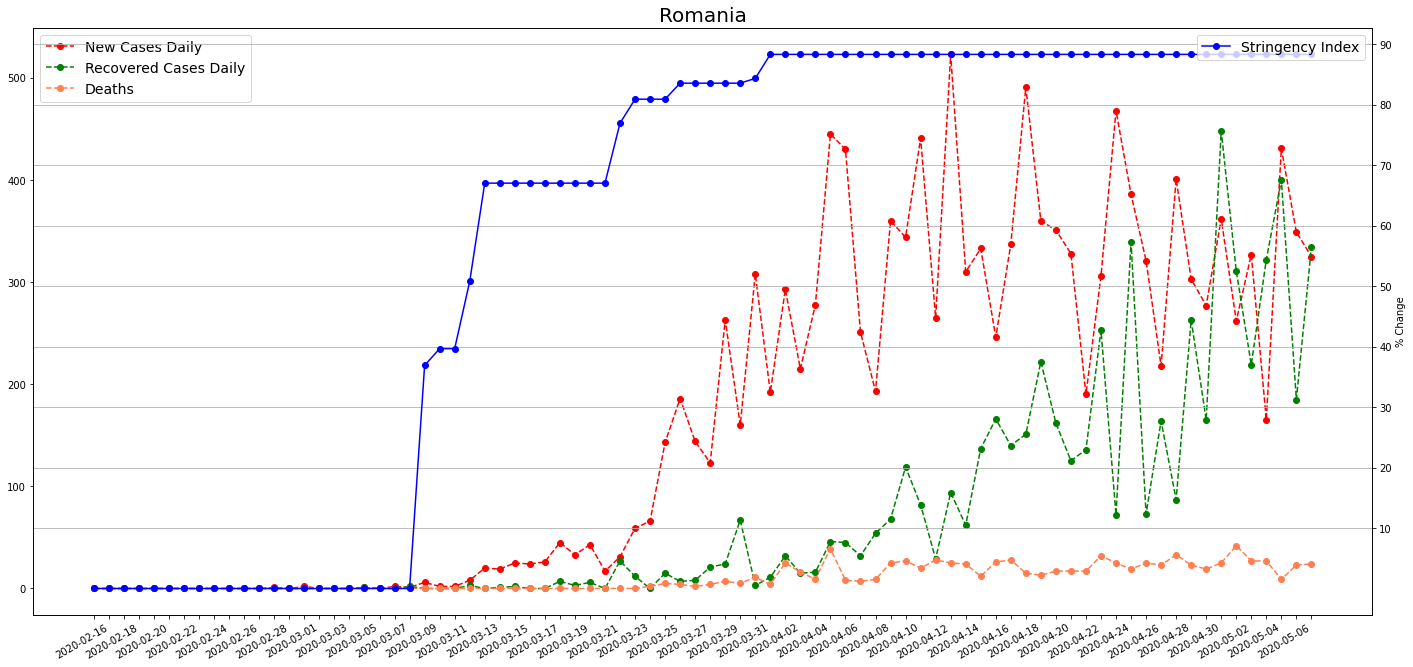

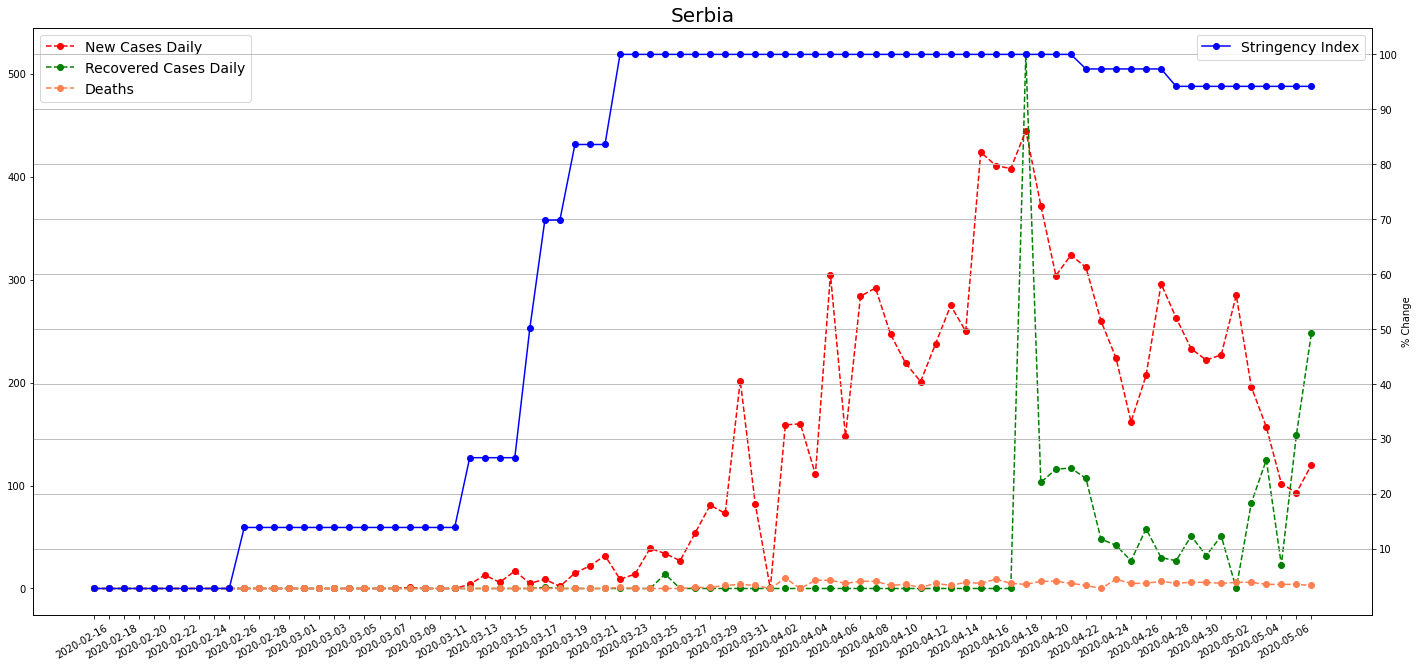

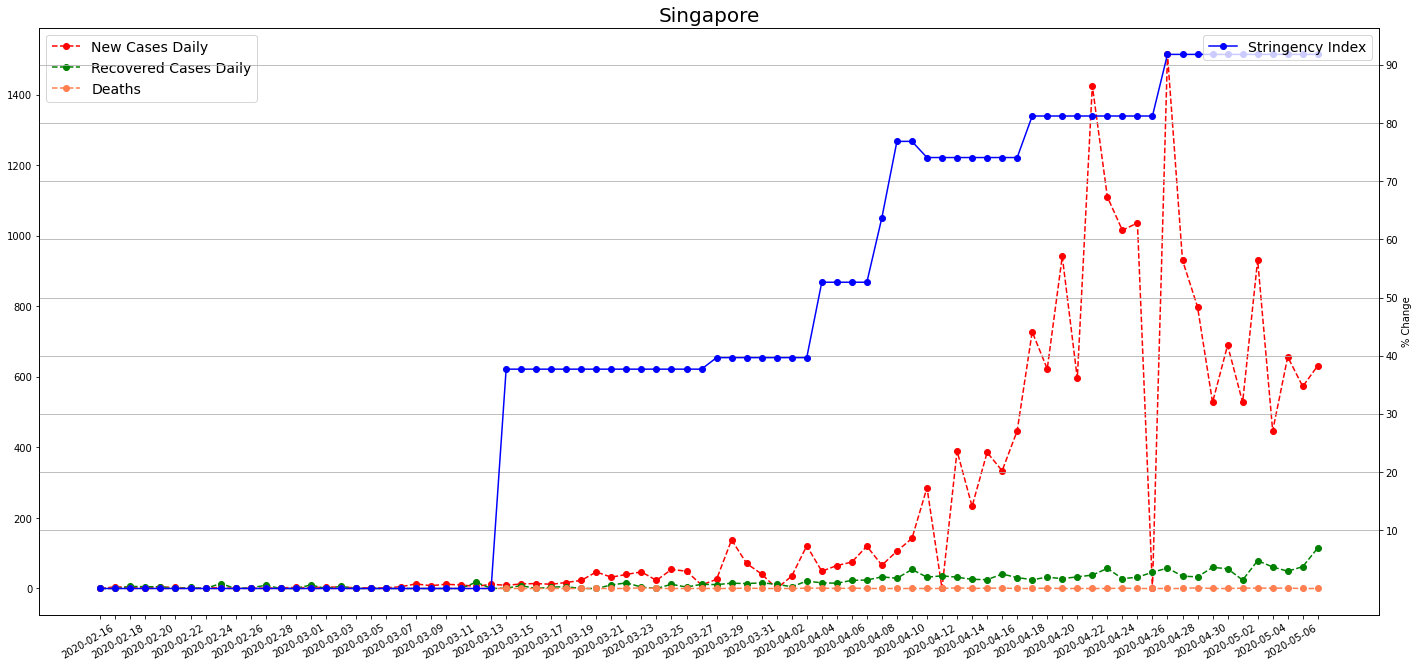

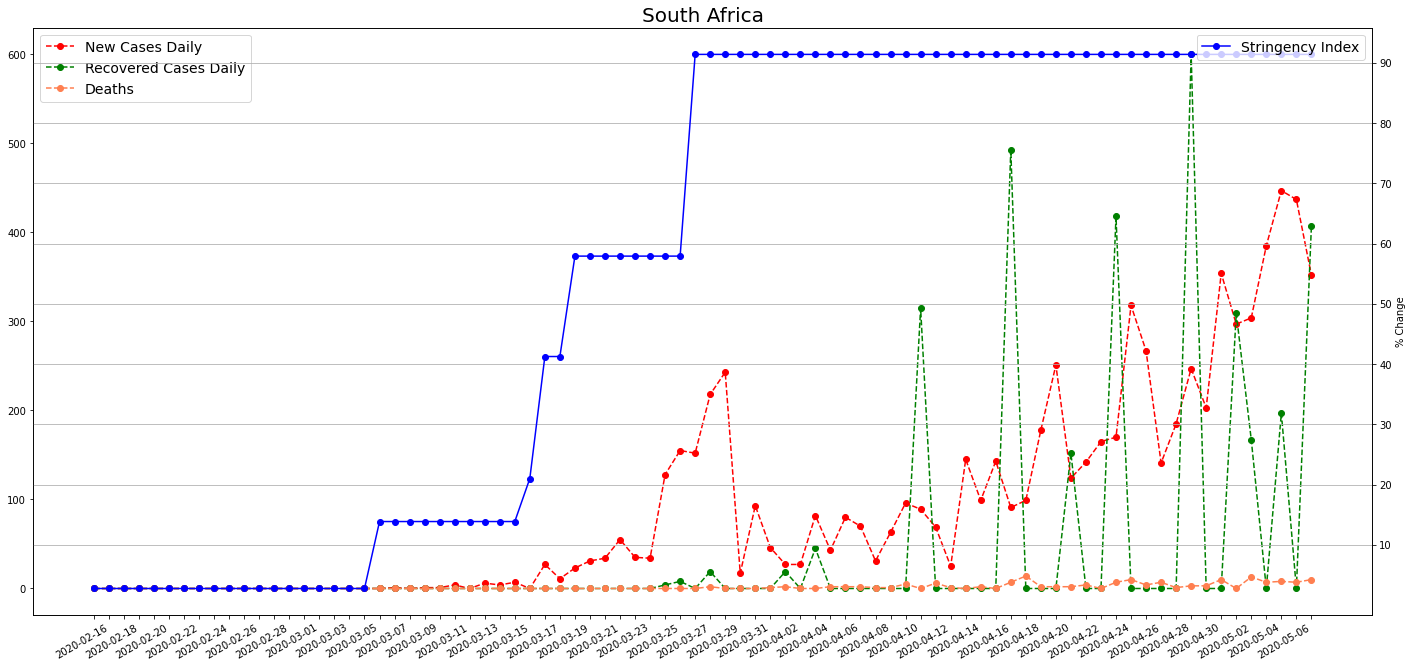

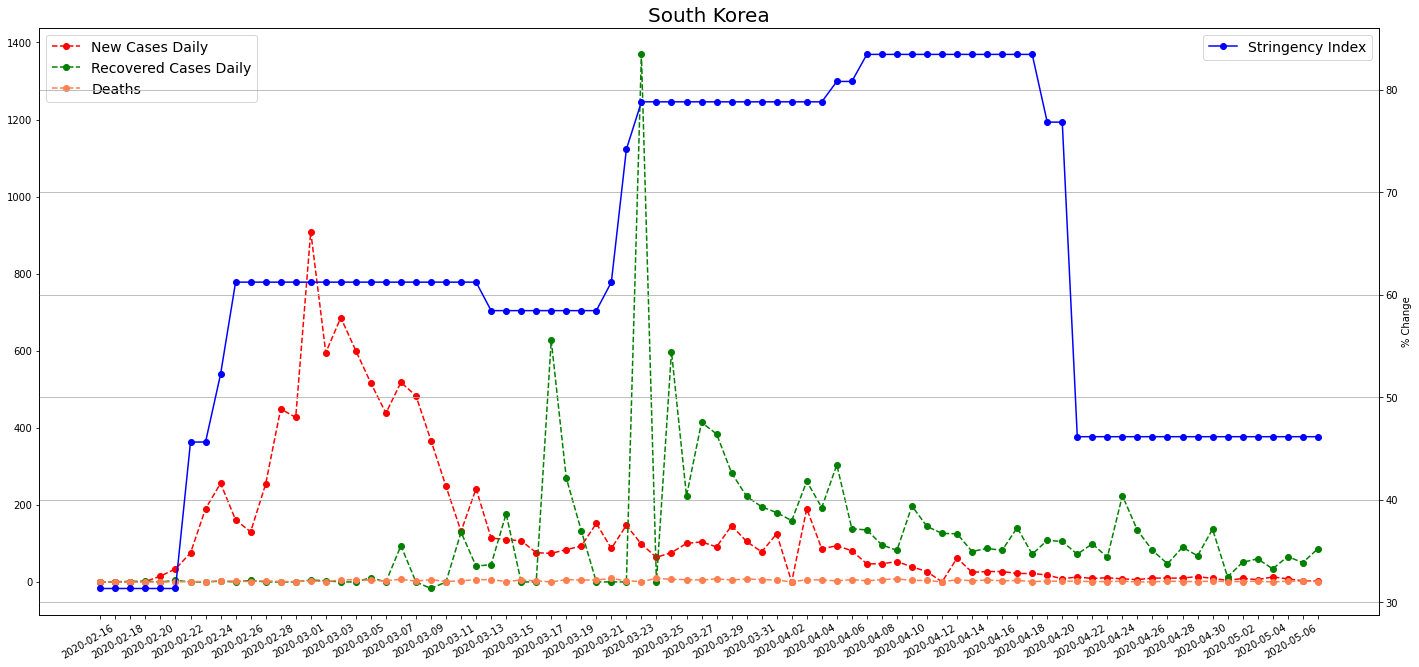

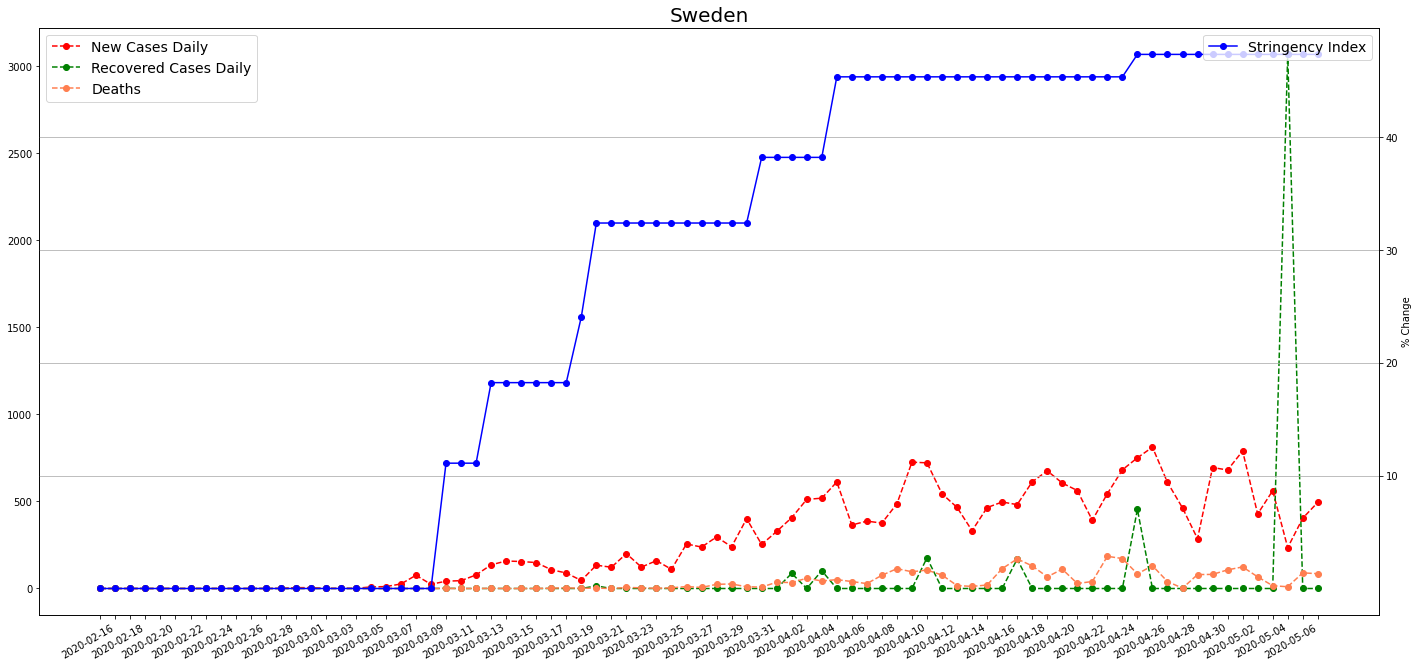

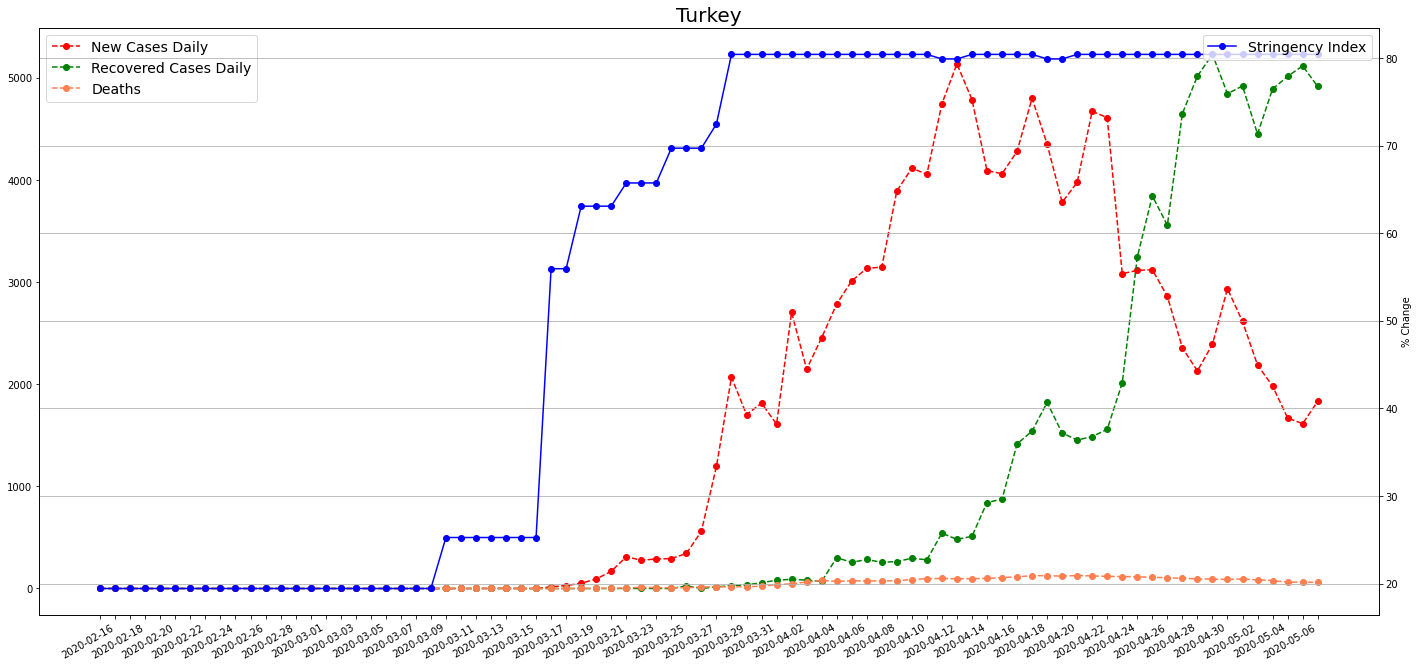

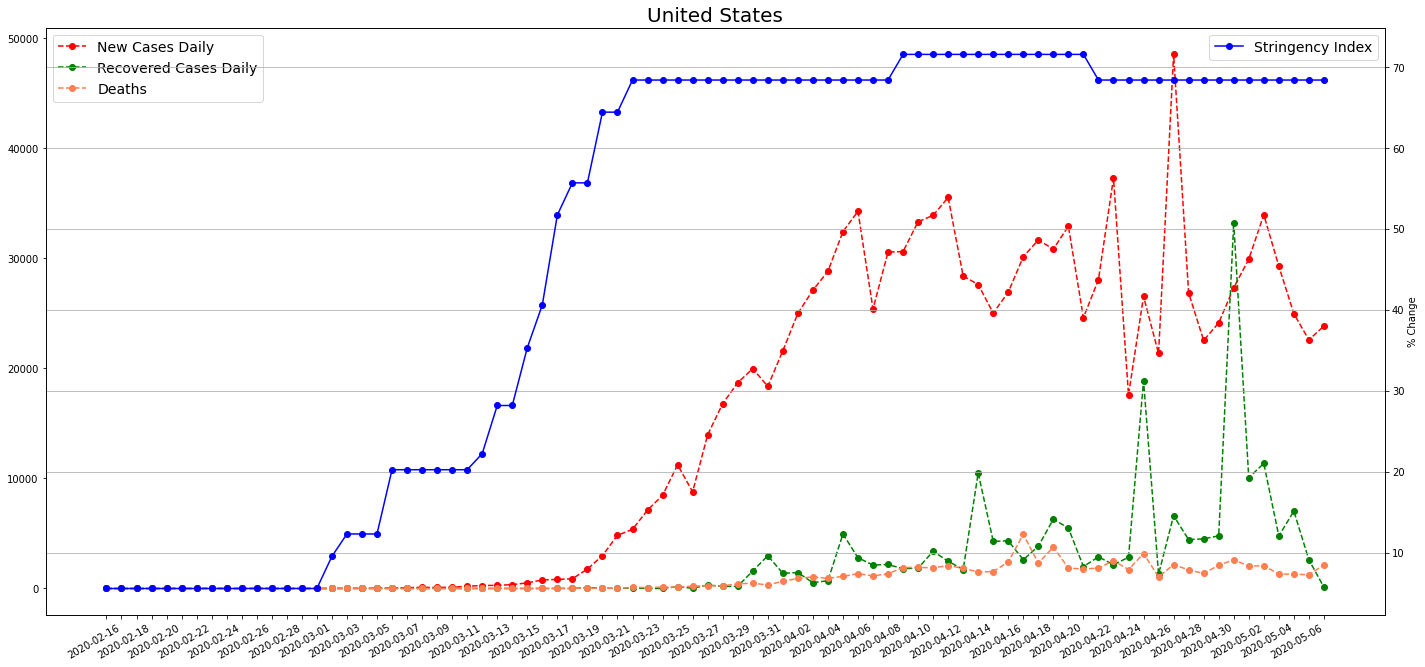

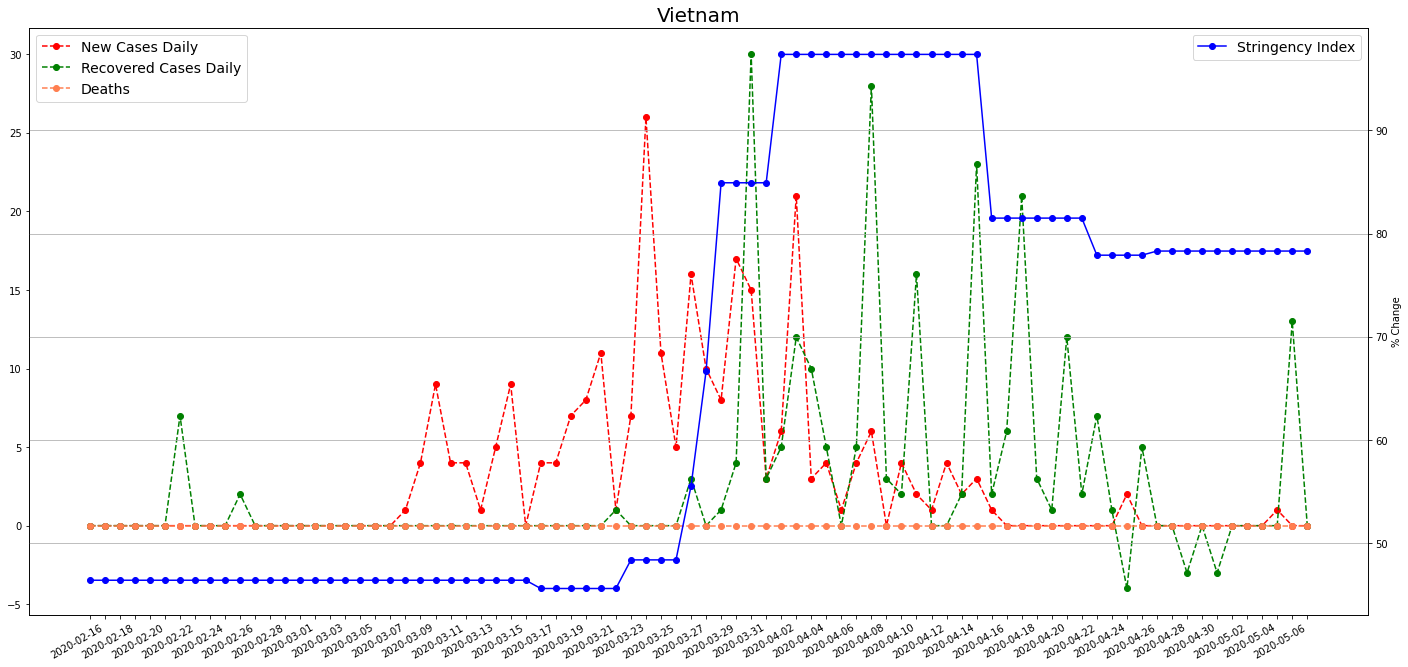

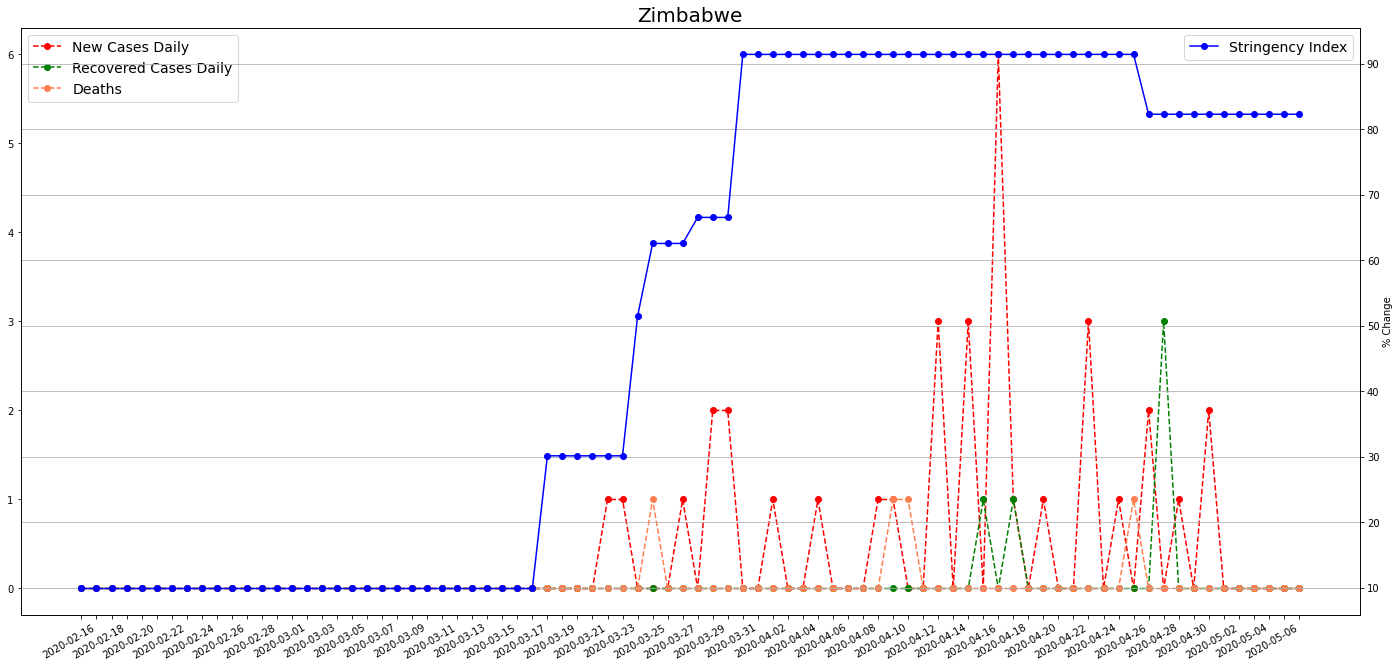

In [ ]:
# plot_country('Vietnam')
for country in countries :
  plot_country(country) 